## Introduction to audio data

By nature, a sound wave is a continuous signal, meaning it contains an infinite number of signal values in a given time. This poses problems for digital devices which expect finite arrays. To be processed, stored, and transmitted by digital devices, the continuous sound wave needs to be converted into a series of discrete values, known as a digital representation.

If you look at any audio dataset, you’ll find digital files with sound excerpts, such as text narration or music. You may encounter different file formats such as .wav (Waveform Audio File), .flac (Free Lossless Audio Codec) and .mp3 (MPEG-1 Audio Layer 3). These formats mainly differ in how they compress the digital representation of the audio signal.

Let’s take a look at how we arrive from a continuous signal to this representation. The analog signal is first captured by a microphone, which converts the sound waves into an electrical signal. The electrical signal is then digitized by an Analog-to-Digital Converter to get the digital representation through sampling.

### Sampling and sampling rate

Sampling is the process of measuring the value of a continuous signal at fixed time steps. The sampled waveform is discrete, since it contains a finite number of signal values at uniform intervals.

![Illustration from Wikipedia article: Sampling (signal processing)](https://huggingface.co/datasets/huggingface-course/audio-course-images/resolve/main/Signal_Sampling.png)
Illustration from Wikipedia article: https://en.wikipedia.org/wiki/Sampling_(signal_processing)


The **sampling rate** (also called sampling frequency) is the number of samples taken in one second and is measured in hertz (Hz). To give you a point of reference, CD-quality audio has a sampling rate of 44,100 Hz, meaning samples are taken 44,100 times per second. For comparison, high-resolution audio has a sampling rate of 192,000 Hz or 192 kHz. A common sampling rate used in training speech models is 16,000 Hz or 16 kHz.

The choice of sampling rate primarily determines the highest frequency that can be captured from the signal. This is also known as the **Nyquist limit** and is exactly half the sampling rate. The audible frequencies in human speech are below 8 kHz and therefore sampling speech at 16 kHz is sufficient. **Using a higher sampling rate will not capture more information and merely leads to an increase in the computational cost of processing such files. On the other hand, sampling audio at too low a sampling rate will result in information loss. Speech sampled at 8 kHz will sound muffled, as the higher frequencies cannot be captured at this rate.**

It’s important to ensure that all audio examples in your dataset have the same sampling rate when working on any audio task. **If you plan to use custom audio data to fine-tune a pre-trained model, the sampling rate of your data should match the sampling rate of the data the model was pre-trained on. The sampling rate determines the time interval between successive audio samples, which impacts the temporal resolution of the audio data. Consider an example:** a 5-second sound at a sampling rate of 16,000 Hz will be represented as a series of 80,000 values, while the same 5-second sound at a sampling rate of 8,000 Hz will be represented as a series of 40,000 values. Transformer models that solve audio tasks treat examples as sequences and rely on attention mechanisms to learn audio or multimodal representation. Since sequences are different for audio examples at different sampling rates, it will be challenging for models to generalize between sampling rates. **Resampling is the process of making the sampling rates match**, and is part of
 [preprocessing](https://huggingface.co/learn/audio-course/chapter1/preprocessing#resampling-the-audio-data) the audio data.

### Amplitude and bit depth

While the sampling rate tells you how often the samples are taken, what exactly are the values in each sample?

**Sound is made by changes in air pressure at frequencies that are audible to humans. The amplitude of a sound describes the sound pressure level at any given instant and is measured in decibels (dB).** We perceive the amplitude as loudness. To give you an example, a normal speaking voice is under 60 dB, and a rock concert can be at around 125 dB, pushing the limits of human hearing.

In digital audio, each audio sample records the amplitude of the audio wave at a point in time. The bit depth of the sample determines with how much precision this amplitude value can be described. The higher the bit depth, the more faithfully the digital representation approximates the original continuous sound wave.

The most common audio bit depths are 16-bit and 24-bit. Each is a binary term, representing the number of possible steps to which the amplitude value can be quantized when it’s converted from continuous to discrete: 65,536 steps for 16-bit audio, a whopping 16,777,216 steps for 24-bit audio. Because quantizing involves rounding off the continuous value to a discrete value, the sampling process introduces noise. The higher the bit depth, the smaller this quantization noise. **In practice, the quantization noise of 16-bit audio is already small enough to be inaudible, and using higher bit depths is generally not necessary.**

**You may also come across 32-bit audio. This stores the samples as floating-point values, whereas 16-bit and 24-bit audio use integer samples.** The precision of a 32-bit floating-point value is 24 bits, giving it the same bit depth as 24-bit audio. Floating-point audio samples are expected to lie within the [-1.0, 1.0] range. Since machine learning models naturally work on floating-point data, the audio must first be converted into floating-point format before it can be used to train the model. We’ll see how to do this in the next section on Preprocessing.

Just as with continuous audio signals, the amplitude of digital audio is typically expressed in decibels (dB). Since human hearing is logarithmic in nature — our ears are more sensitive to small fluctuations in quiet sounds than in loud sounds — the loudness of a sound is easier to interpret if the amplitudes are in decibels, which are also logarithmic. **The decibel scale for real-world audio starts at 0 dB, which represents the quietest possible sound humans can hear, and louder sounds have larger values. However, for digital audio signals, 0 dB is the loudest possible amplitude, while all other amplitudes are negative. As a quick rule of thumb: every -6 dB is a halving of the amplitude, and anything below -60 dB is generally inaudible unless you really crank up the volume.**

### Audio as a waveform

You may have seen sounds visualized as a waveform, which plots the sample values over time and illustrates the changes in the sound’s amplitude. This is also known as the time domain representation of sound.

This type of visualization is useful for identifying specific features of the audio signal such as the timing of individual sound events, the overall loudness of the signal, and any irregularities or noise present in the audio.

To plot the waveform for an audio signal, we can use a Python library called librosa:

In [1]:
!pip install -q librosa

In [2]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [5]:
array, array.shape, sampling_rate

(array([-1.4068222e-03, -4.4607258e-04, -4.1098078e-04, ...,
         7.9623051e-06, -3.0417003e-05,  1.2765067e-05], dtype=float32),
 (117601,),
 22050)

The example is loaded as a tuple of audio time series (here we call it array), and sampling rate (sampling_rate). Let’s take a look at this sound’s waveform by using librosa’s waveshow() function:

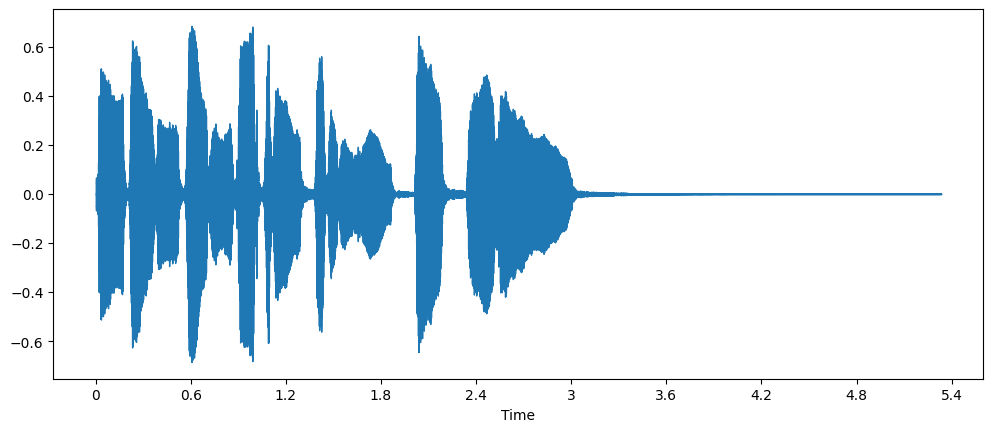

In [3]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

This plots the amplitude of the signal on the y-axis and time along the x-axis. In other words, each point corresponds to a single sample value that was taken when this sound was sampled. Also note that librosa returns the audio as floating-point values already, and that the amplitude values are indeed within the [-1.0, 1.0] range.

Visualizing the audio along with listening to it can be a useful tool for understanding the data you are working with. You can see the shape of the signal, observe patterns, learn to spot noise or distortion. **If you preprocess data in some ways, such as normalization, resampling, or filtering, you can visually confirm that preprocessing steps have been applied as expected. After training a model, you can also visualize samples where errors occur (e.g. in audio classification task) to debug the issue.**

### The frequency spectrum

Another way to visualize audio data is to plot the frequency spectrum of an audio signal, also known as the **frequency domain representation. The spectrum is computed using the discrete Fourier transform or DFT.** It describes the individual frequencies that make up the signal and how strong they are.

Let’s plot the frequency spectrum for the same trumpet sound by taking the DFT using numpy’s rfft() function. While it is possible to plot the spectrum of the entire sound, it’s more useful to look at a small region instead. Here we’ll take the DFT over the first 4096 samples, which is roughly the length of the first note being played:

In [8]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

dft, dft.shape

(array([ 8.43918495e-04+0.00000000e+00j, -3.44816845e-04-3.07024772e-04j,
         6.10497309e-05-9.10487281e-05j, ...,
         4.39336929e-07-2.38820147e-09j,  5.45468624e-07-7.68767356e-07j,
        -1.51548133e-06+0.00000000e+00j]),
 (2049,))

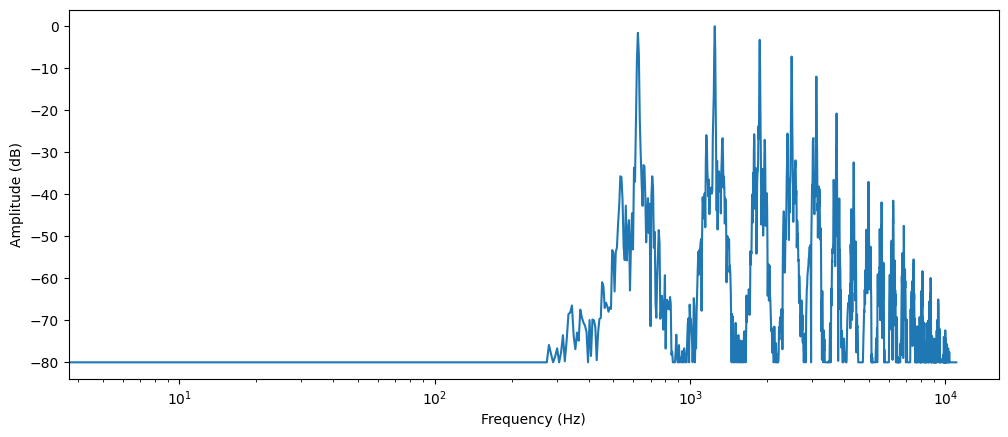

In [9]:
# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

This plots the strength of the various frequency components that are present in this audio segment. The frequency values are on the x-axis, usually plotted on a logarithmic scale, while their amplitudes are on the y-axis.

The frequency spectrum that we plotted shows several peaks. These peaks correspond to the harmonics of the note that’s being played, with the higher harmonics being quieter. Since the first peak is at around 620 Hz, this is the frequency spectrum of an E♭ note.

The output of the DFT is an array of complex numbers, made up of real and imaginary components. Taking the magnitude with np.abs(dft) extracts the amplitude information from the spectrogram. The angle between the real and imaginary components provides the so-called phase spectrum, but this is often discarded in machine learning applications.

You used librosa.amplitude_to_db() to convert the amplitude values to the decibel scale, making it easier to see the finer details in the spectrum. Sometimes people use the power spectrum, which measures energy rather than amplitude; this is simply a spectrum with the amplitude values squared.

> 💡 In practice, people use the term FFT interchangeably with DFT, as the FFT or Fast Fourier Transform is the only efficient way to calculate the DFT on a computer.

The frequency spectrum of an audio signal contains the exact same information as its waveform — they are simply two different ways of looking at the same data (here, the first 4096 samples from the trumpet sound). Where the waveform plots the amplitude of the audio signal over time, the spectrum visualizes the amplitudes of the individual frequencies at a fixed point in time.

### Spectrogram

What if we want to see how the frequencies in an audio signal change? The trumpet plays several notes and they all have different frequencies. The problem is that the spectrum only shows a frozen snapshot of the frequencies at a given instant. The solution is to take multiple DFTs, each covering only a small slice of time, and stack the resulting spectra together into a spectrogram.

**A spectrogram plots the frequency content of an audio signal as it changes over time. It allows you to see time, frequency, and amplitude all on one graph. The algorithm that performs this computation is the STFT or Short Time Fourier Transform.**

The spectrogram is one of the most informative audio tools available to you. For example, when working with a music recording, you can see the various instruments and vocal tracks and how they contribute to the overall sound. In speech, you can identify different vowel sounds as each vowel is characterized by particular frequencies.

Let’s plot a spectrogram for the same trumpet sound, using librosa’s stft() and specshow() functions:

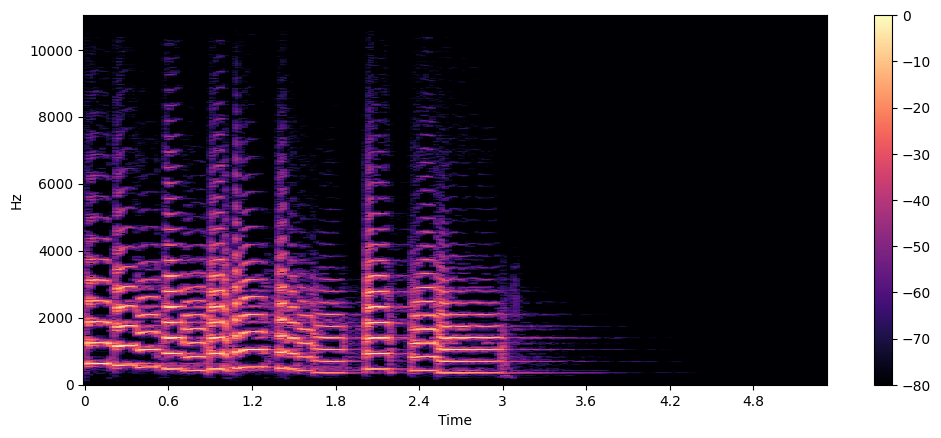

In [10]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In this plot, the x-axis represents time as in the waveform visualization but now the y-axis represents frequency in Hz. The intensity of the color gives the amplitude or power of the frequency component at each point in time, measured in decibels (dB).

The spectrogram is created by taking short segments of the audio signal, typically lasting a few milliseconds, and calculating the discrete Fourier transform of each segment to obtain its frequency spectrum. The resulting spectra are then stacked together on the time axis to create the spectrogram. Each vertical slice in this image corresponds to a single frequency spectrum, seen from the top. By default, librosa.stft() splits the audio signal into segments of 2048 samples, which gives a good trade-off between frequency resolution and time resolution.

Since the spectrogram and the waveform are different views of the same data, it’s possible to turn the spectrogram back into the original waveform using the inverse STFT. However, this requires the phase information in addition to the amplitude information. **If the spectrogram was generated by a machine learning model, it typically only outputs the amplitudes. In that case, we can use a phase reconstruction algorithm such as the classic Griffin-Lim algorithm, or using a neural network called a vocoder, to reconstruct a waveform from the spectrogram.**

Spectrograms aren’t just used for visualization. Many machine learning models will take spectrograms as input — as opposed to waveforms — and produce spectrograms as output.

Now that we know what a spectrogram is and how it’s made, let’s take a look at a variant of it widely used for speech processing: the mel spectrogram.

### Mel spectrogram

A mel spectrogram is a variation of the spectrogram that is commonly used in speech processing and machine learning tasks. **It is similar to a spectrogram in that it shows the frequency content of an audio signal over time, but on a different frequency axis.**

In a standard spectrogram, the frequency axis is linear and is measured in hertz (Hz). However, the human auditory system is more sensitive to changes in lower frequencies than higher frequencies, and this sensitivity decreases logarithmically as frequency increases. The mel scale is a perceptual scale that approximates the non-linear frequency response of the human ear.

To create a mel spectrogram, the STFT is used just like before, splitting the audio into short segments to obtain a sequence of frequency spectra. Additionally, each spectrum is sent through a set of filters, the so-called mel filterbank, to transform the frequencies to the mel scale.

Let’s see how we can plot a mel spectrogram using librosa’s melspectrogram() function, which performs all of those steps for us:

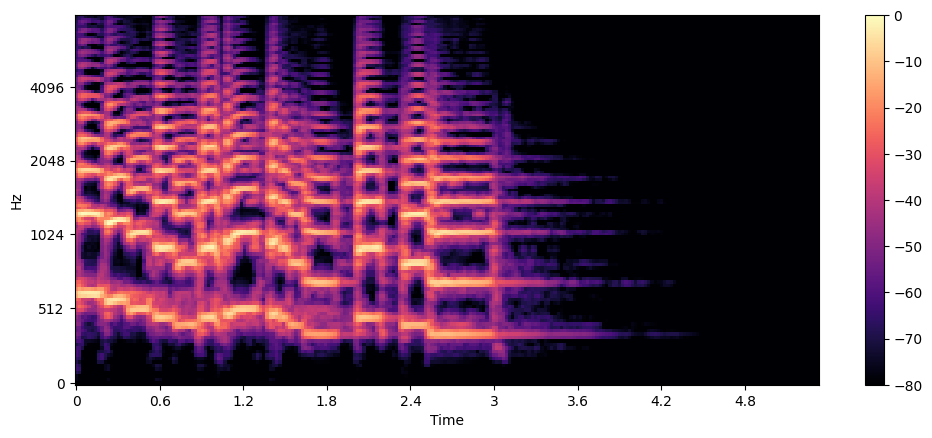

In [11]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

In the example above, **n_mels stands for the number of mel bands to generate. The mel bands define a set of frequency ranges that divide the spectrum into perceptually meaningful components, using a set of filters whose shape and spacing are chosen to mimic the way the human ear responds to different frequencies.** Common values for n_mels are 40 or 80. fmax indicates the highest frequency (in Hz) we care about.

Just as with a regular spectrogram, it’s common practice to express the strength of the mel frequency components in decibels. This is commonly referred to as a log-mel spectrogram, because the conversion to decibels involves a logarithmic operation. The above example used librosa.power_to_db() as librosa.feature.melspectrogram() creates a power spectrogram.

> 💡 Not all mel spectrograms are the same! There are two different mel scales in common use ("htk" and "slaney"), and instead of the power spectrogram the amplitude spectrogram may be used. The conversion to a log-mel spectrogram doesn't always compute true decibels but may simply take the `log`. Therefore, if a machine learning model expects a mel spectrogram as input, double check to make sure you're computing it the same way.

**Creating a mel spectrogram is a lossy operation as it involves filtering the signal. Converting a mel spectrogram back into a waveform is more difficult than doing this for a regular spectrogram, as it requires estimating the frequencies that were thrown away. This is why machine learning models such as HiFiGAN vocoder are needed to produce a waveform from a mel spectrogram.**

Compared to a standard spectrogram, a mel spectrogram can capture more meaningful features of the audio signal for human perception, making it a popular choice in tasks such as speech recognition, speaker identification, and music genre classification.

Now that you know how to visualize audio data examples, go ahead and try to see what your favorite sounds look like. :)

## Load and explore an audio dataset

In this course we will use the 🤗 Datasets library to work with audio datasets. 🤗 Datasets is an open-source library for downloading and preparing datasets from all modalities including audio. The library offers easy access to an unparalleled selection of machine learning datasets publicly available on Hugging Face Hub. Moreover, 🤗 Datasets includes multiple features tailored to audio datasets that simplify working with such datasets for both researchers and practitioners.

One of the key defining features of 🤗 Datasets is the ability to download and prepare a dataset in just one line of Python code using the load_dataset() function.

Let’s load and explore and audio dataset called MINDS-14, which contains recordings of people asking an e-banking system questions in several languages and dialects.

To load the MINDS-14 dataset, we need to copy the dataset’s identifier on the Hub (PolyAI/minds14) and pass it to the load_dataset function. We’ll also specify that we’re only interested in the Australian subset (en-AU) of the data, and limit it to the training split:

In [12]:
!pip install -q datasets[audio]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [13]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


minds14.py:   0%|          | 0.00/5.83k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


MInDS-14.zip:   0%|          | 0.00/471M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

The dataset contains 654 audio files, each of which is accompanied by a transcription, an English translation, and a label indicating the intent behind the person’s query. The audio column contains the raw audio data. Let’s take a closer look at one of the examples:



In [14]:
example = minds[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

You may notice that the audio column contains several features. Here’s what they are:

- path: the path to the audio file (*.wav in this case).
- array: The decoded audio data, represented as a 1-dimensional NumPy array.
- sampling_rate. The sampling rate of the audio file (8,000 Hz in this example).

The intent_class is a classification category of the audio recording. To convert this number into a meaningful string, we can use the int2str() method:

In [15]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

If you look at the transcription feature, you can see that the audio file indeed has recorded a person asking a question about paying a bill.

If you plan to train an audio classifier on this subset of data, you may not necessarily need all of the features. For example, the lang_id is going to have the same value for all examples, and won’t be useful. The english_transcription will likely duplicate the transcription in this subset, so we can safely remove them.

You can easily remove irrelevant features using 🤗 Datasets’ remove_columns method:

In [16]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

Now that we’ve loaded and inspected the raw contents of the dataset, let’s listen to a few examples! We’ll use the Blocks and Audio features from Gradio to decode a few random samples from the dataset:



In [18]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.4 MB/s eta 0:00:00


In [19]:
import gradio as gr

# GRADIO DOES WEIRD SOMETIMES, SEE ALTERNATIVE NEXT CELL
def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:574: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://aa2237332f2dc3f98d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://aa2237332f2dc3f98d.gradio.live


In [23]:
from IPython.display import Audio, display

example = minds.shuffle()[0]
audio = example["audio"]

sampling_rate, audio_array = (audio["sampling_rate"], audio["array"])


# Display the audio player in the notebook
display(Audio(data=audio_array, rate=sampling_rate))

If you’d like to, you can also visualize some of the examples. Let’s plot the waveform for the first example.



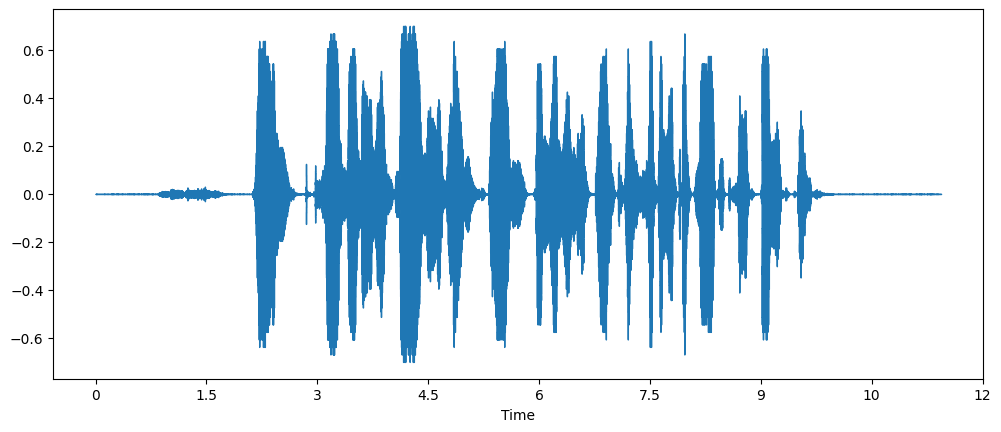

In [24]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

# THIS IS FACKING COOL